# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定【data的資料夾路徑】，命名為【data_folder】
data_folder = 'C:/Users/Ynitsed/Documents/GitHub/2nd-ML100Days/data'

# 設定t001為某個data路徑
# 設定t002為pd裡read data的功能
# 註釋一下路徑位置，%s參數(和%d)的使用方法與限制，參考learning。
t001 = os.path.join(data_folder, 'application_train.csv')
t002 = pd.read_csv(t001)
print('Path of read in data: %s' %t001)
print(t002.shape)
t002.head()

Path of read in data: C:/Users/Ynitsed/Documents/GitHub/2nd-ML100Days/data\application_train.csv
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for d in t002:
    if t002[d].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(t002[d].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            # Day9開始真的有換老師，上面這種解釋Day8之前是完全不寫的。
            t002[d] = le.fit_transform(t002[d])            
print(t002.shape)
t002.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 可以發現只有兩種值的，都轉變成【0,1】了
# 於是我很好奇【CODE_GENDER】為啥沒變...
t002['CODE_GENDER'].value_counts()
# 原來有null (XNA)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [5]:
# 另外我也很好奇，為啥作業要處理一個【365243】
t002['DAYS_EMPLOYED'].value_counts().head()
# 原來是發現了【365243】不但是眾數而且還是異常值
# 幹~那作業直接跳要我們處理異常值，這誰會知道怎回事？開天眼？不用查就知道要把【365243】處理掉？

 365243    55374
-200         156
-224         152
-199         151
-230         151
Name: DAYS_EMPLOYED, dtype: int64

In [6]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
t002['DAYS_EMPLOYED_ANOM'] = t002['DAYS_EMPLOYED'] == 365243
t002['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 處理後，再看一次~
t002['DAYS_EMPLOYED'].value_counts().head()
# 很好，【365243】不見了。

-200.0    156
-224.0    152
-230.0    151
-199.0    151
-212.0    150
Name: DAYS_EMPLOYED, dtype: int64

In [7]:
# 同理，你要處理異常資料，你必須先發現異常資料啊！
# 看都還沒看，就知道【DAYS_BIRTH】發生負號問題，要取絕對值？
t002['DAYS_BIRTH'].value_counts().head()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
Name: DAYS_BIRTH, dtype: int64

In [8]:
# 這作業答案根本上帝視角啊！神預測啊！不用看就知道要取絕對值處理啊！
# 出生日數 (DAYS_BIRTH) 取絕對值 
t002['DAYS_BIRTH'] = abs(t002['DAYS_BIRTH'])

In [9]:
# 然後取完還不用檢查啊！喔對祂是上帝何必檢查？
t002['DAYS_BIRTH'].value_counts().head()

13749    43
13481    42
10020    41
18248    41
15771    40
Name: DAYS_BIRTH, dtype: int64

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [10]:
# 列出【所有欄位】(包括【TARGET】本身)，對【TARGET】的相關係數。
t002.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


In [20]:
# False是降序
# True是升序
t003 = t002.corr()['TARGET'].sort_values(ascending=False)
t004 = t002.corr()['TARGET'].sort_values(ascending=True)

# 顯示相關係數最大 / 最小的各15個欄位名稱
print('Most Positive Correlations:\n', t003.head(15))
print('\nMost Negative Correlations:\n', t004.head(15))


Most Positive Correlations:
 TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226


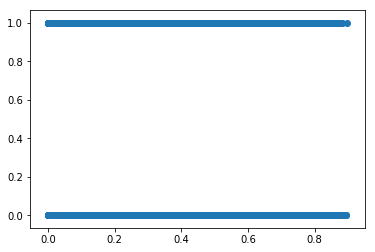

In [22]:
# 直接畫散佈圖，看不出來任何訊息
plt.scatter(t002['EXT_SOURCE_3'], t002['TARGET']) 

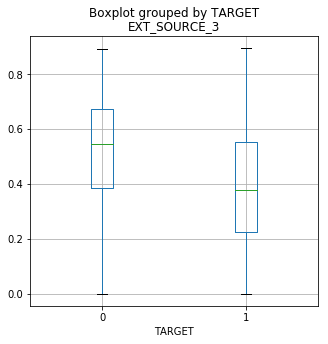

In [31]:
# 用箱型圖畫就看得出來了
t002.boxplot(column='EXT_SOURCE_3', by='TARGET', showfliers = False, figsize=(5,5))
plt.show()

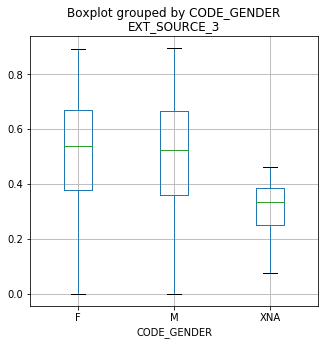

In [33]:
t002.boxplot(column='EXT_SOURCE_3', by='CODE_GENDER', showfliers = False, figsize=(5,5))
plt.show()

### Day10教材方向和目標
0. from sklearn.preprocessing import [LabelEncoder](https://blog.csdn.net/u010412858/article/details/78386407)，一個欄位只有兩個值轉成0,1的寫法
1. for迴圈+if的寫法
2. .replace({365243: np.nan}, inplace = True) 取代成null的寫法
3. Python的等於(=)是在定義某個被我們另外命名的變數或參數，  
   等於等於(==)才真的是我們理解上的等於，例如某個欄位裡面某個值==某個值的時候怎樣怎樣。
4. .corr()的使用
5. [.sort_values](https://blog.csdn.net/wendaomudong_l2d4/article/details/80648633)
6. \n原來可以包在要印出的文字裡當作分行符號，到底還有多少類似的東西可以用？(%s,%d,\n)
7. head(15)：取前面15個
8. tail(15)：取後面15個
9. scatter vs. boxplot

### Day10忽略部分
pdf有提到y軸轉換(log-scale)，但作業完全沒看到。
 
### Day10其他補充
本日教材順序有點問題，取絕對值的那段；  
scatter vs. boxplot的比較，設計得不錯；
但轉成0,1這件事，要怎麼看誰被轉成0,誰被轉成1？

其實蠻多事情沒講清楚的。  

為什麼要轉成0和1，是為了要取corr，corr只能去針對數字作分析，
會有0和1的處理，表示現在還沒有函數，可以直接將只有兩個值的欄位以dummy去做相關係數，這照理講寫得出來才對。
除此之外，boxplot的畫圖橫軸其實不限定於數字，如上'CODE_GENDER'也能跑得出來，可見boxplot的by可以是數字也可以是文字。
所以轉0和1這件事，單純就是為了要能取corr，也不是為了後面要可以畫圖。
相關係數的概念，總之只是看這欄位和你目標欄位的相關係數，所以0是誰1是誰並不重要，
如果真的想看0或1對應目標欄位的狀況，那再用boxplot看就好(這時才有誰是0誰是1的問題)。